<a href="https://colab.research.google.com/github/h011010/analyse-des-offres_d_emploi_forem/blob/main/analyse_des_offres_d_emploi_forem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

nous allons analyser les données publiées par Le Forem - Service Data Management
le 2025-01-28 sur le site: https://data.gov.be/fr/datasets/httpswwwodwbbeexploredatasetoffres-d-emploi-forem
c'est données représentent des offres d'emploi publiées sur le site du Forem.
Il s'agit d'offres qui sont créées directement par des employeurs ou qui proviennent de partenaires tels que des sociétés d'intérim via des flux automatiques.

Nous essayerons de répondre a ces questions:

1) Analyse des tendances du marché du travail
    # a) Quels sont les secteurs qui recrutent le plus en ce moment ?
    # b) Quels types de contrats sont les plus proposés (CDI, CDD, intérim) ?
    # c) Quels sont les métiers les plus demandés ?
  
2) Analyse géographique
    # a) Dans quelles régions y a-t-il le plus d'offres d'emploi ?

3) Exigences des employeurs
    #a) Quels niveaux d'études sont le plus souvent demandés ?
    #b) Quelle est l'importance des langues dans le marché de l'emploi belge ?
    #c) Quels secteurs exigent le plus d'expérience préalable ?
    
4) Opportunités pour les chercheurs d'emploi
    #a) Quels secteurs offrent des opportunités même sans expérience ?
    #b) Quels métiers recrutent le plus avec un diplôme minimal ?
    #c) Où trouve-t-on le plus de CDI ?



In [4]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


importation de module dont on aura besoin

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import numpy as np

directory="/gdrive/MyDrive/data/offres_d_emploi_forem.csv"
df=pd.read_csv(directory , sep=";")

%load_ext google.colab.data_table permet d'activer l'affichage interactif des tableaux :

In [ ]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
df

,Référence du Forem,Intitulé de l'offre,Lieux de travail,Région,Code postal,Code Nuts,Coordonnées géographiques,Type de contrat,Nom de l'employeur,Régime de travail,...,Permis de conduire,Secteur d'activité,Code NACE,Source de l'offre,Référence externe,URL Forem,Début de diffusion,Fin de diffusion,Métier,Code DIMECO
0,1134755,Aide-opérateur (H/F/X),OREYE,"Belgique,Province de Liège,RÉGION WALLONNE",4360,"BE,BE33,BE3","[{'lon': 5.353694, 'lat': 50.72868}]",Durée Déterminée,Start People,Temps plein,...,NaN,Autres industries manufacturières,32,Jobat,8476611_FR,https://www.leforem.be/recherche-offres/offre-...,2024-11-22,2024-12-20,Montage-assemblage mécanique,H2909
1,1184764,Opérateur de Production en Atelier de Charpent...,Couvin,"Province de Namur,Belgique,RÉGION WALLONNE",5660,"BE35,BE,BE3","[{'lon': 4.4955, 'lat': 50.05249}]",Intérimaire avec option sur durée indéterminée,Start People - START PEOPLE Philippeville,Temps plein,...,NaN,Activités des agences de travail temporaire,78200,Via site Forem,NaN,https://www.leforem.be/recherche-offres/offre-...,2024-12-26,2025-02-18,Opérateur / Opératrice de production bois,H220201-1
2,1091577,Tourneur CNC (H/F/X),AALST,"Belgique,Province de Flandre Orientale,RÉGION ...",9300,"BE,BE23,BE2","[{'lon': 4.042909, 'lat': 50.960338}]",Durée Indéterminée,PENNE,Temps plein,...,NaN,Fabrication d'outillage,2573,VDAB,69393850,https://www.leforem.be/recherche-offres/offre-...,2024-11-05,2025-05-05,Régleur-opérateur / Régleuse-opératrice machin...,H290301-3
3,1135411,Employé Support RH (H/F/X),BEERSEL,"Belgique,Province du Brabant Flamand,RÉGION FL...",1654,"BE,BE24,BE2","[{'lon': 4.276401, 'lat': 50.745785}]",Durée Déterminée,Start People,Temps plein,...,NaN,"Construction de bâtiments,promotion immobilière",41,Jobat,8479862_FR,https://www.leforem.be/recherche-offres/offre-...,2024-11-22,2024-12-20,Management des ressources humaines,M1503
4,1184801,Peintre industriel secteur châssis (H/F/X),Philippeville,"Province de Namur,Belgique,RÉGION WALLONNE",5600,"BE35,BE,BE3","[{'lon': 4.544903, 'lat': 50.195588}]",Intérimaire avec option sur durée indéterminée,Start People - START PEOPLE Philippeville,Temps plein,...,NaN,Activités des agences de travail temporaire,78200,Via site Forem,NaN,https://www.leforem.be/recherche-offres/offre-...,2024-12-26,2025-02-18,Peintre industriel / Peintre industrielle,H340401-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24010,1235251,Chargé de contact bilingue FR/NL (H/F/X),WAREMME,"Belgique,Province de Liège,RÉGION WALLONNE",4300,"BE,BE33,BE3","[{'lon': 5.255023, 'lat': 50.697884}]",Intérimaire,Synergie Belgium,Temps plein,...,NaN,Autres services personnels,96,References,10286837,https://www.leforem.be/recherche-offres/offre-...,2025-02-06,2025-03-08,Administration de systèmes d'information,M1801
24011,1235239,Responsable de site - secteur Tourisme (H/F/X),THUIN,"Belgique,Province du Hainaut,RÉGION WALLONNE",6530,"BE,BE32,BE3","[{'lon': 4.288065, 'lat': 50.339893}]",Intérimaire,Actief Interim Philippeville,Temps plein,...,NaN,Autres services personnels,96,References,10286773,https://www.leforem.be/recherche-offres/offre-...,2025-02-06,2025-03-23,Opérations administratives,M1602
24012,1235246,Gestionnaire logistique et comptable - Financ...,MONS,"Belgique,Province du Hainaut,RÉGION WALLONNE",7000,"BE,BE32,BE3","[{'lon': 3.948737, 'lat': 50.453335}]",Durée déterminée,UCLouvain,Temps plein,...,NaN,Activités de banque centrale,64110,References,10286802,https://www.leforem.be/recherche-offres/offre-...,2025-02-06,2025-02-26,Comptabilité,M1203
24013,1235248,Coffreur (H/F/X),COMINES-WARNETON,"Belgique,Province du Hainaut,RÉGION WALLONNE",7780,"BE,BE32,BE3","[{'lon': 2.998014, 'lat': 50.768234}]",Intérimaire,Actief Interim Ieper,Temps plein,...,NaN,Installation de machines et d'équipements indu...,332,References,10286812,https://www.leforem.be/recherche-offres/offre-...,2025-02-06,2025-03-23,Maçonnerie,F1703


exploration préliminaire des données


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24015 entries, 0 to 24014
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Référence du Forem         24015 non-null  int64 
 1   Intitulé de l'offre        24015 non-null  object
 2   Lieux de travail           22294 non-null  object
 3   Région                     24015 non-null  object
 4   Code postal                22294 non-null  object
 5   Code Nuts                  24002 non-null  object
 6   Coordonnées géographiques  21860 non-null  object
 7   Type de contrat            24015 non-null  object
 8   Nom de l'employeur         23996 non-null  object
 9   Régime de travail          24015 non-null  object
 10  Nombre de postes           24015 non-null  int64 
 11  Niveaux études             11995 non-null  object
 12  Code ISCED                 9249 non-null   object
 13  Langues                    19093 non-null  object
 14  Code I

,Référence du Forem,Nombre de postes,Code NACE
count,2.401500e+04,24015.000000,2.401500e+04
mean,1.215194e+06,1.169519,8.544803e+04
std,2.095480e+04,1.530687,6.706976e+05
min,4.078900e+04,1.000000,1.000000e+00
25%,1.206268e+06,1.000000,4.300000e+01
50%,1.218826e+06,1.000000,7.800000e+01
75%,1.227754e+06,1.000000,5.510000e+04
max,1.235259e+06,100.000000,9.604002e+06


1) Analyse des tendances du marché du travail

a) Quels sont les secteurs qui recrutent le plus en ce moment ?
    
  

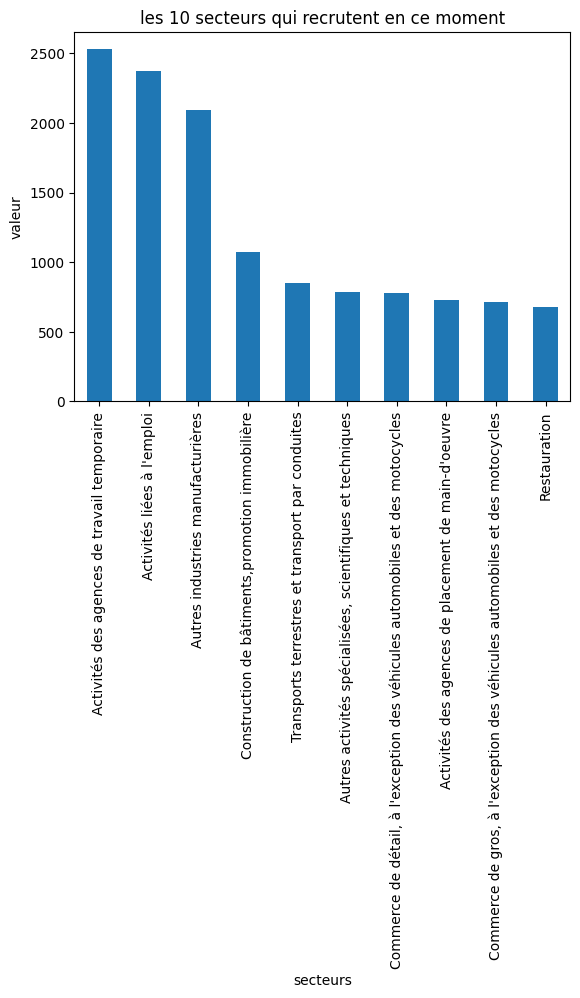

In [ ]:
df["Secteur d'activité"].value_counts(ascending=False).head(10).plot.bar()
mp.title("les 10 secteurs qui recrutent en ce moment")
mp.xlabel("secteurs")
mp.ylabel("valeur")
mp.show()

b) Quels types de contrats sont les plus proposés (CDI, CDD, intérim) ?
  


Text(0, 0.5, 'contrat')

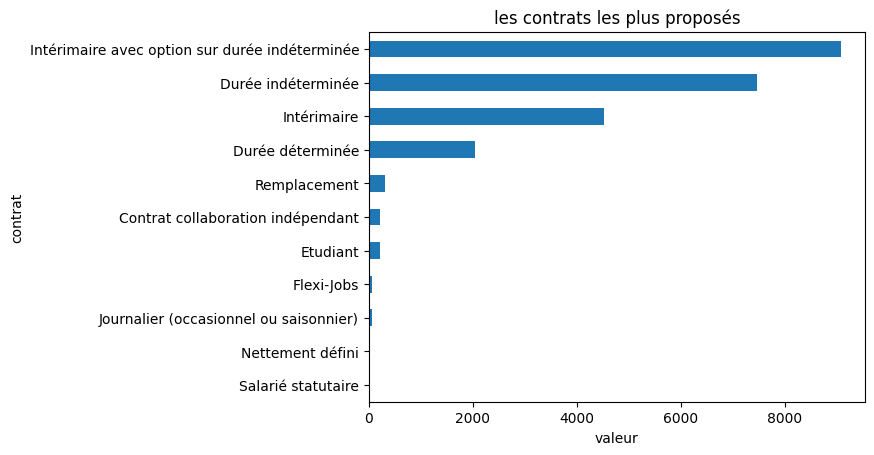

In [19]:
#ciblé les index des lignes où le nom de la colonne Type de contrat est mal écrit
i=df.loc[df["Type de contrat"]=="Durée Déterminée"].index.tolist()
j=df.loc[df["Type de contrat"]=="Intérimaire avec option sur Durée indéterminée"].index.tolist()
k=df.loc[df["Type de contrat"]=="Durée Indéterminée"].index.tolist()
#modification du nom de ces lignes par nom des lignes majoritaires
df.loc[i,"Type de contrat"]="Durée déterminée"
df.loc[j,"Type de contrat"]="Intérimaire avec option sur durée indéterminée"
df.loc[k,"Type de contrat"]="Durée indéterminée"
#comptage des valeures pour chaque type de contrat
df["Type de contrat"].value_counts(ascending=True).plot.barh()
mp.title("les contrats les plus proposés")
mp.xlabel("valeur")
mp.ylabel("contrat")

c) Quels sont les 30 métiers les plus demandés ?


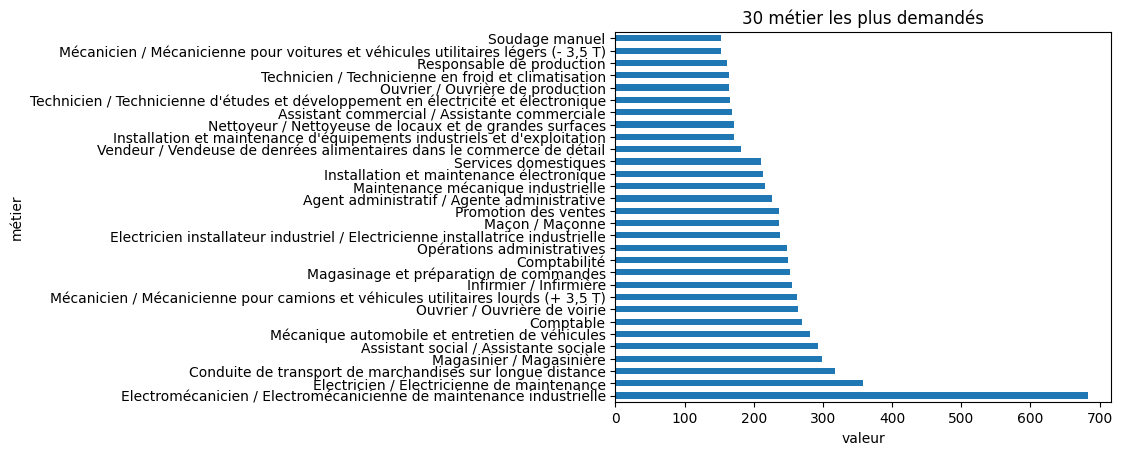

In [16]:
df["Métier"].isnull().any() # savoir si la colonne contient au moins une valeur null
df["Métier"].value_counts(ascending=False).head(30).plot.barh()
mp.title("30 métier les plus demandés")
mp.xlabel("valeur")
mp.ylabel("métier")
mp.show()

2) Analyse géographique

    # a) Dans quelles régions y a-t-il le plus d'offres d'emploi ?

  a) Dans quelles régions y a-t-il le plus d'offres d'emploi ?

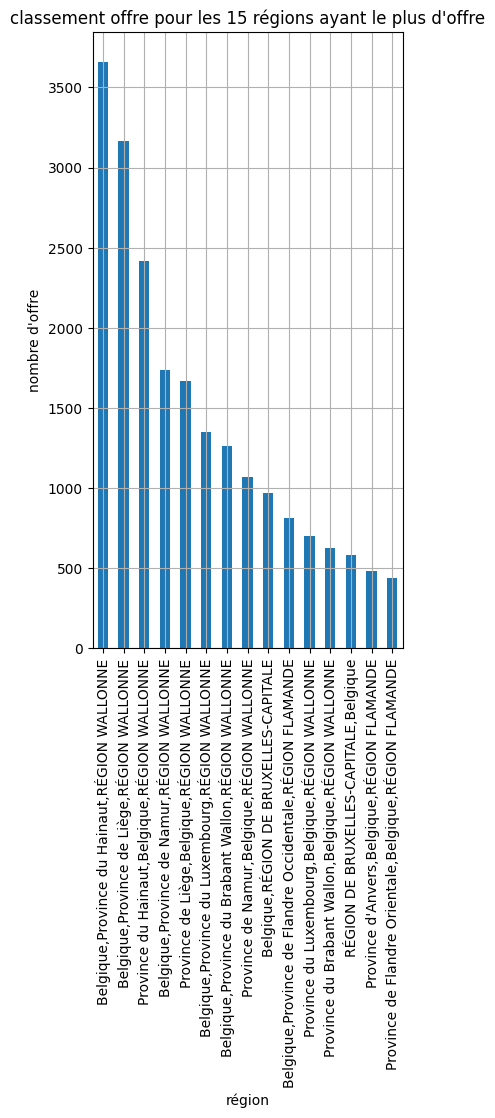

In [15]:
df["Région"].value_counts().head(15).plot.bar(figsize=(4,8)) # les region ayant le plus d'offrens
mp.title("classement offre pour les 15 régions ayant le plus d'offre")
mp.xlabel("région")
mp.ylabel("nombre d'offre")
mp.grid(True)
mp.show()

3) Exigences des employeurs
    #a) Quels niveaux d'études sont le plus souvent demandés ?
    #b) Quelle est l'importance des langues dans le marché de l'emploi belge ?
    #c) Quels secteurs exigent le plus d'expérience préalable ?
    


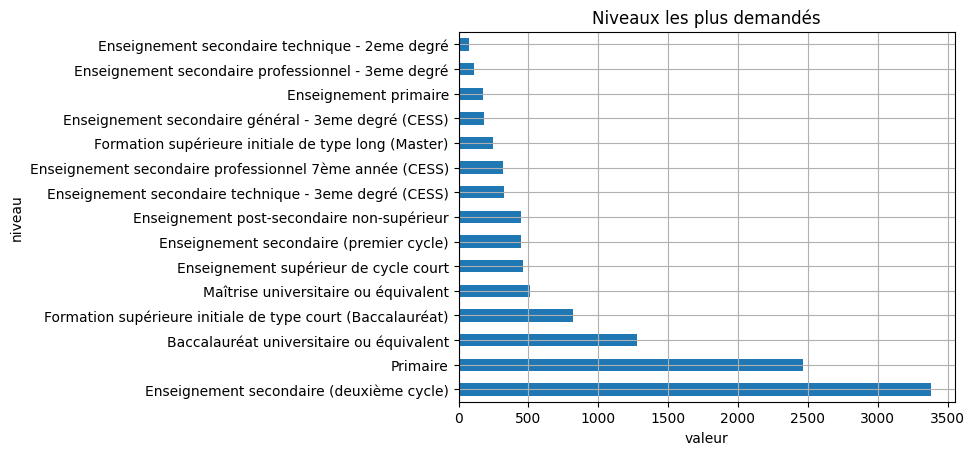

In [ ]:
df.dropna(subset=["Niveaux études"], inplace=True)
df["Niveaux études"].value_counts(ascending=False).head(15).plot.barh()
mp.grid(True)
mp.title("Niveaux les plus demandés")
mp.xlabel("valeur")
mp.ylabel("niveau")
mp.show()

b) Quelle est l'importance des langues dans le marché de l'emploi belge ?
   

In [32]:
df.dropna(subset=["Langues"], inplace=True)
def sep (l)
  return


object


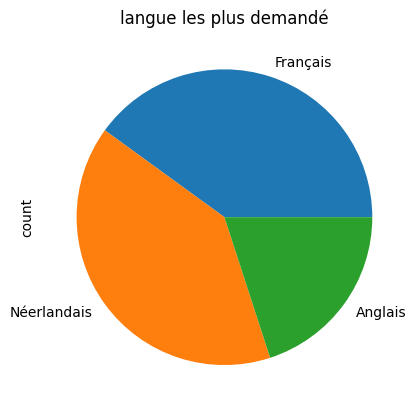

In [28]:
df.dropna(subset=["Langues"], inplace=True) # supprime les valeurs nulls
#separont les langue de la colonne "Langues"  a fin d'avoir un comptage optimal
ensemble=[]
def separer (p):
   if isinstance(p,str): # retourne un bool en fonction de si "p" est un string ou pas
      return p.split(",") # si oui retourner une list de string de langues
   return []              # si "p" n'est pas une chaine retourne une liste vite au cas où on a un type NAN

ensemble=df["Langues"].apply(separer).explode().head(5) # explode() permet "exploser" chaque élément de la liste dans une ligne distincte.
ensemble.value_counts().plot.pie()
mp.title("langue les plus demandé")
mp.show()

b-b) le top 5 des deux langues les plus demandé ensemble

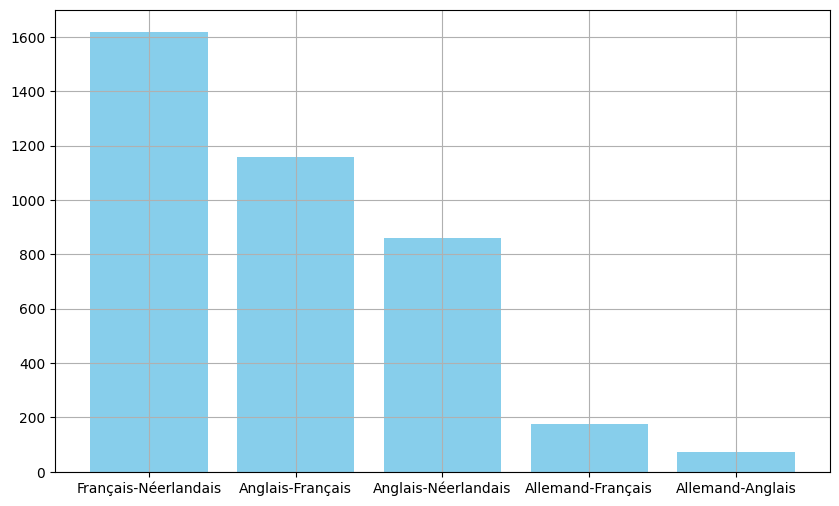

In [38]:
from itertools import combinations
from collections import Counter
count = Counter()
df.dropna(subset=["Langues"], inplace=True)

# Parcourir chaque ligne de la colonne "Langues"
ensemble=[]
for langues in df["Langues"]:
    ensemble = langues.split(",")  # Séparer les langues
    pairs = combinations(ensemble, 2)  # Générer toutes les paires possibles

    # Trier chaque paire pour éviter les doublons inversés
    trier_pairs = [tuple(sorted(pair)) for pair in pairs]

    # Mettre à jour le compteur avec les paires triées
    count.update(trier_pairs)

top_5 = count.most_common(5)
# Séparer les données pour le graphique
pairs, frequencies = zip(*top_5)
# Convertir les paires en chaînes pour faciliter l'affichage
pair_labels = []
for p in pairs:
    pair_labels.append(p[0]+'-'+p[1])

# Créer le graphique à barres
mp.figure(figsize=(10, 6))
mp.bar(pair_labels, frequencies, color='skyblue')
mp.grid(True)
mp.show()

 c) Quels secteurs exigent le plus d'expérience préalable ?

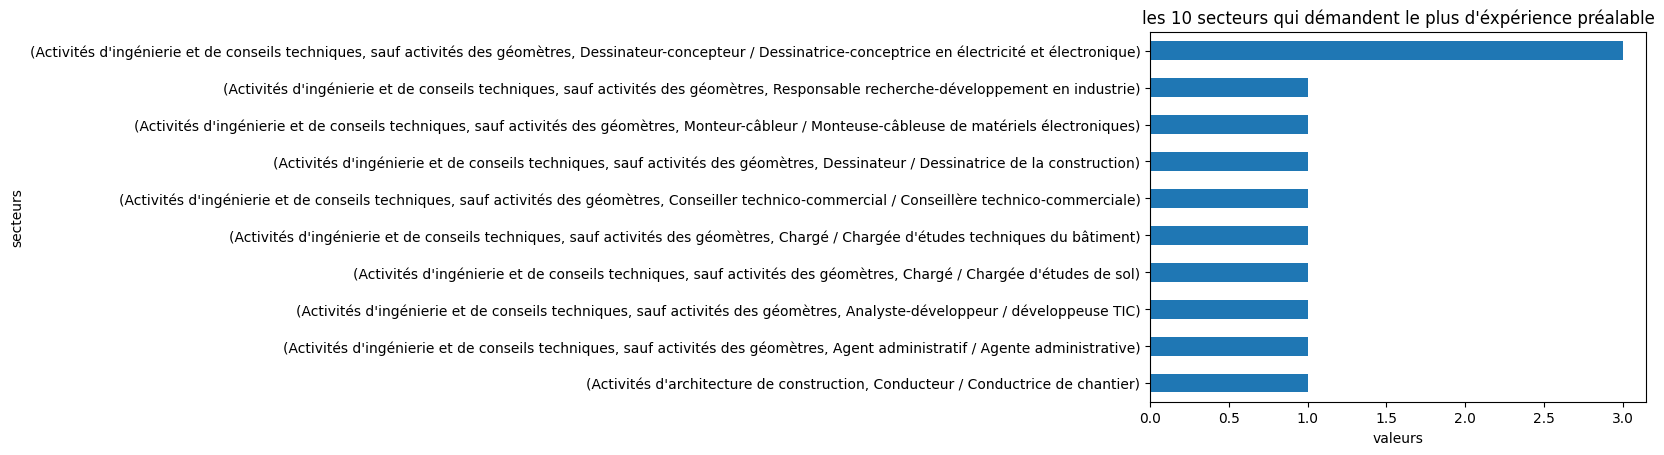

In [ ]:
df.dropna(subset=["Expériences requises"], inplace=True)
df.groupby("Secteur d'activité")["Expériences requises"].value_counts().head(10).sort_values(ascending=True).plot.barh()
mp.title("les 10 secteurs qui démandent le plus d'éxpérience préalable")
mp.ylabel("secteurs")
mp.xlabel("valeurs")
mp.show()

4) Opportunités pour les chercheurs d'emploi
    #a) Quels secteurs offrent des opportunités même sans expérience ?
    #b) Quels métiers recrutent le plus avec un diplôme minimal ?
    #c) Où trouve-t-on le plus de CDI par rapport aux CDD/intérims ?



a) Quels secteurs offrent des opportunités même sans expérience ?

<ipython-input-70-a5963f61db50>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Expériences requises"].fillna ("sans expérience", inplace=True)


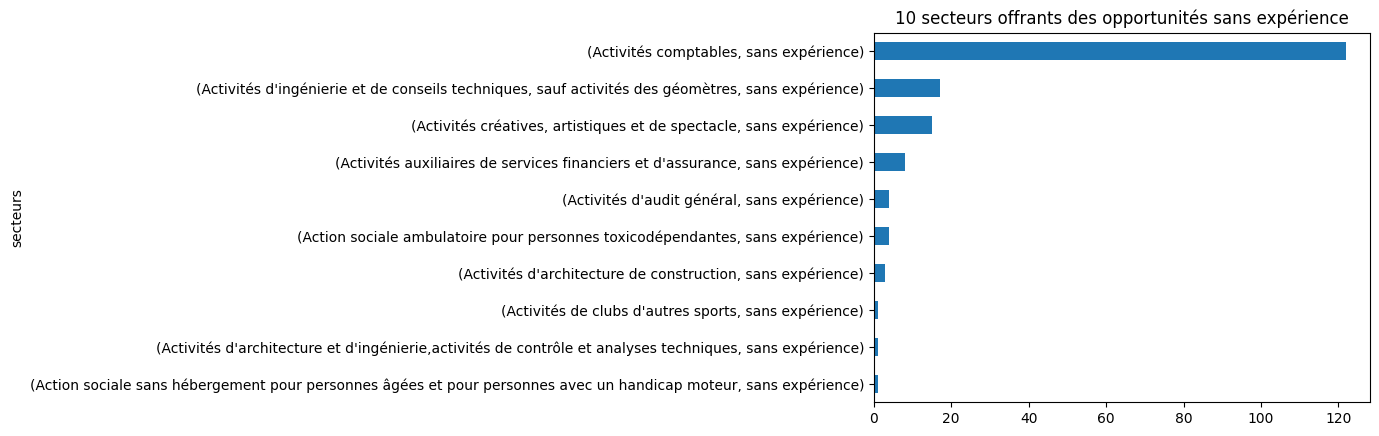

In [ ]:
df["Expériences requises"].fillna ("sans expérience", inplace=True)
sans_Exp=df[df["Expériences requises"]=="sans expérience"]
sans_Exp.groupby("Secteur d'activité")["Expériences requises"].value_counts().head(10).sort_values(ascending=True).plot.barh()
mp.title("10 secteurs offrants des opportunités sans expérience")
mp.ylabel("secteurs")
mp.show()

b) Quels métiers recrutent le plus avec un diplôme minimal ?


<ipython-input-48-f54ce02775e9>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  index = df[df["Niveaux études"].str.contains("(CESS)")].index


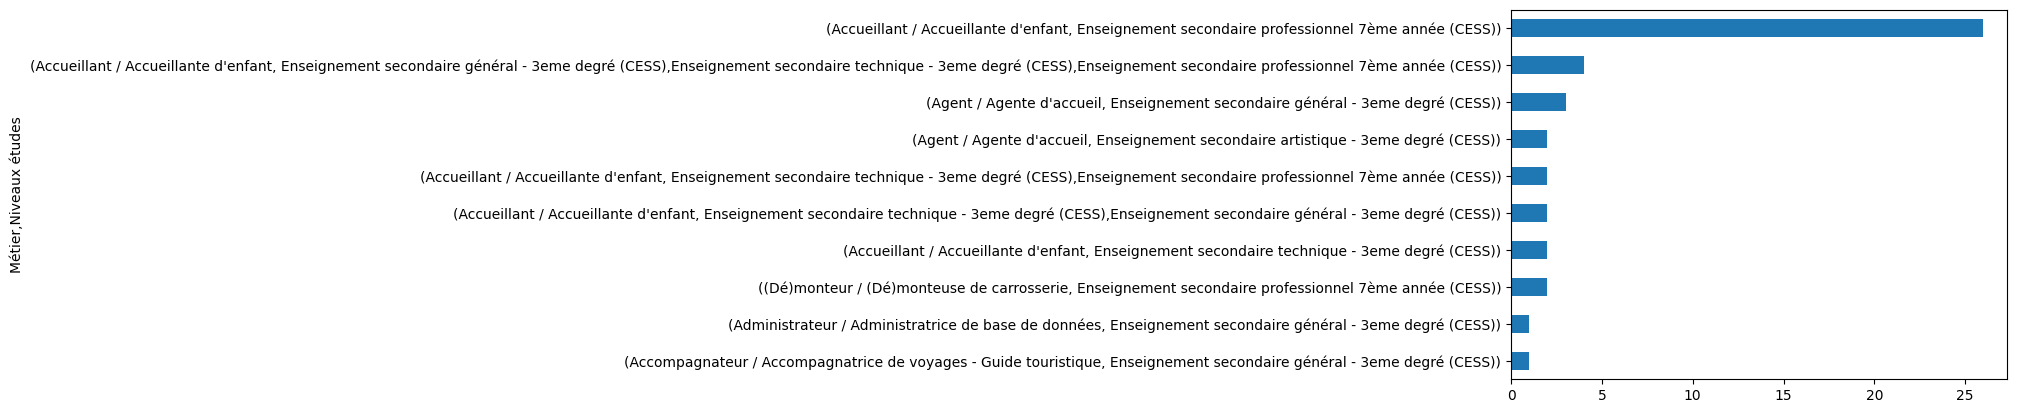

In [48]:
index=[]
df.dropna(subset="Niveaux études", inplace=True)
index = df[df["Niveaux études"].str.contains("(CESS)")].index
d_diplome=df.loc[index]
d_diplome.groupby("Métier")["Niveaux études"].value_counts().head(10).sort_values(ascending=True).plot.barh()
mp.show()

c) Où trouve-t-on le plus de CDI

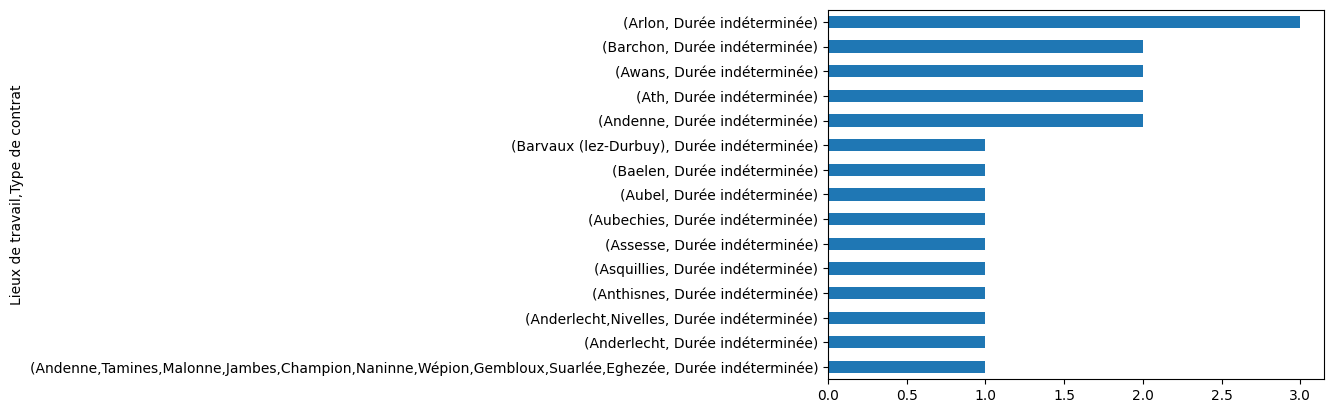

In [ ]:
index = df[df["Type de contrat"].str.contains("Durée Indéterminée" or "durée indéterminée", case=False, na=False)].index
d_cdi=df.loc[index]
d_cdi.groupby("Lieux de travail")["Type de contrat"].value_counts().head(15).sort_values(ascending=True).plot.barh()
mp.show()